<a href="https://colab.research.google.com/github/yumnazakkiya/DQLAB_ML_AI/blob/main/SESI03/Data_Visualization_and_EDA_Handson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt # Matplotlib
import seaborn as sns # Seaborn
import plotly.express as px # Plotly Express

Pada Hands-On kali ini kita akan menggunakan Library Matplotlib, Seaborn, dan Plotly Express untuk melakukan visualisasi pada dataset yang kita punya

# Import Dataset

In [ ]:
df = pd.read_csv('HousingData.csv')

In [ ]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


# Basic Visualization

## Bar Chart

In [ ]:
count_chas = df['CHAS'].value_counts().reset_index()
count_chas.columns = ['CHAS', 'count']
count_chas

,CHAS,count
0,0.0,452
1,1.0,34


<BarContainer object of 2 artists>

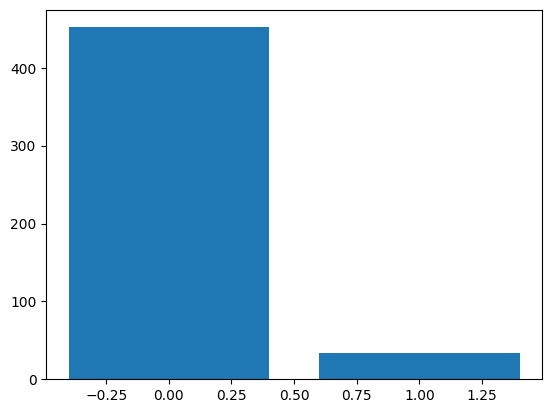

In [ ]:
plt.bar(count_chas['CHAS'], count_chas['count'])

<Axes: xlabel='CHAS', ylabel='count'>

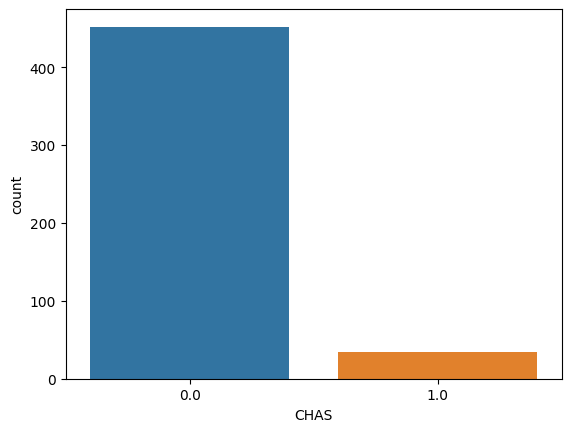

In [ ]:
sns.barplot(x=count_chas['CHAS'], y=count_chas['count'])

* Bar chart biasa digunakan untuk membandingkan beberapa kategori.
* Terlihat jumlah data pada CHAS 0 lebih banyak daripada CHAS 1

## Line Chart

In [ ]:
count_zn = df['ZN'].value_counts().reset_index()
count_zn.columns = ['ZN', 'count']
count_zn = count_zn.sort_values('ZN')
count_zn

,ZN,count
0,0.0,360
4,12.5,10
22,17.5,1
25,18.0,1
1,20.0,20
13,21.0,4
3,22.0,10
5,25.0,10
20,28.0,2
8,30.0,5


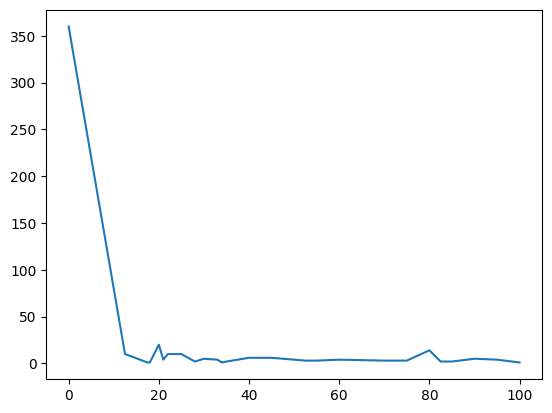

In [ ]:
plt.plot(count_zn['ZN'], count_zn['count'])

<Axes: xlabel='ZN', ylabel='count'>

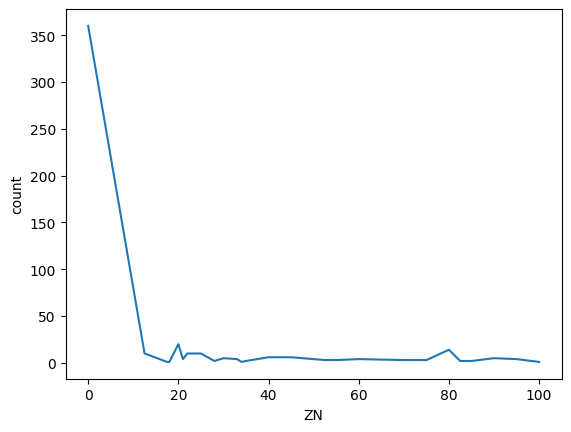

In [ ]:
sns.lineplot(x=count_zn['ZN'], y=count_zn['count'])

* Line chart biasanya digunakan untuk melihat pergerakan data (biasanya digunakan untuk data time series)

## Histogram

(array([360.,  12.,  46.,  12.,  12.,   6.,   4.,   6.,  18.,  10.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <BarContainer object of 10 artists>)

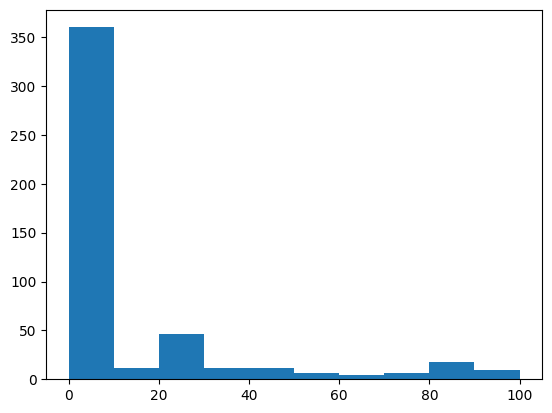

In [ ]:
plt.hist(df['ZN'], bins=10)

<Axes: xlabel='ZN', ylabel='Count'>

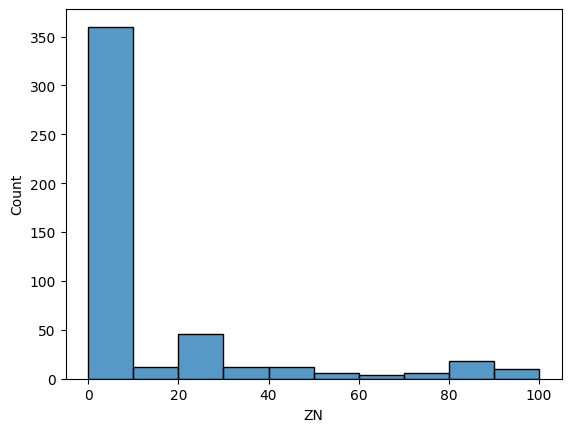

In [ ]:
sns.histplot(df['ZN'], bins=10)

* Terlihat distribusi pada data adalah skewed.
* Nantinya perlu ditransformasi menggunakan log transformation untuk model machine learning yang membutuhkan data dengan distribusi normal.

## Box Plot

{'whiskers': [<matplotlib.lines.Line2D at 0x7f96285361a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f96285366e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9628535ed0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f9628536c20>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f9628536ec0>],
 'means': []}

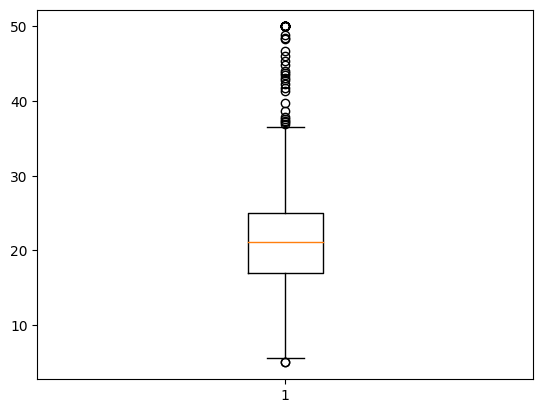

In [ ]:
plt.boxplot(df['MEDV'])

<Axes: >

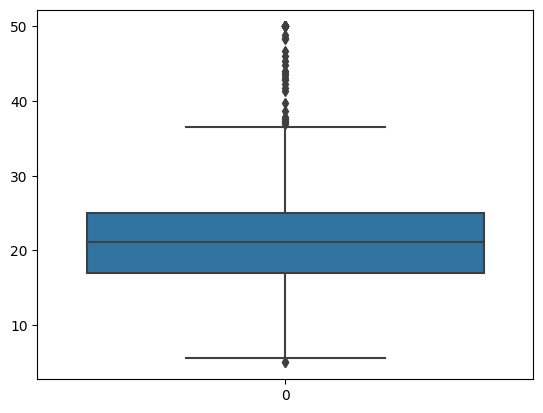

In [ ]:
sns.boxplot(df['MEDV'])

* Terdapat beberapa outlier di luar batas bawah dan atas

## Scatter Plot

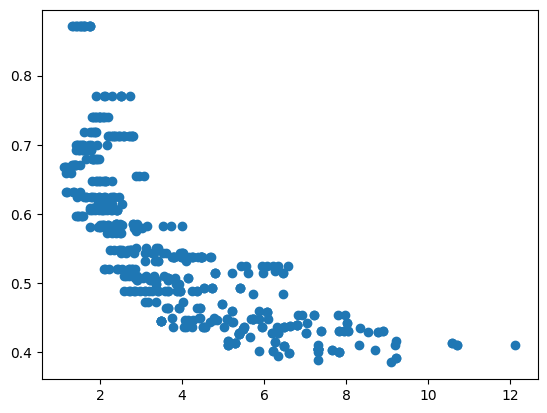

In [ ]:
plt.scatter(df['DIS'], df['NOX'])

<Axes: xlabel='DIS', ylabel='NOX'>

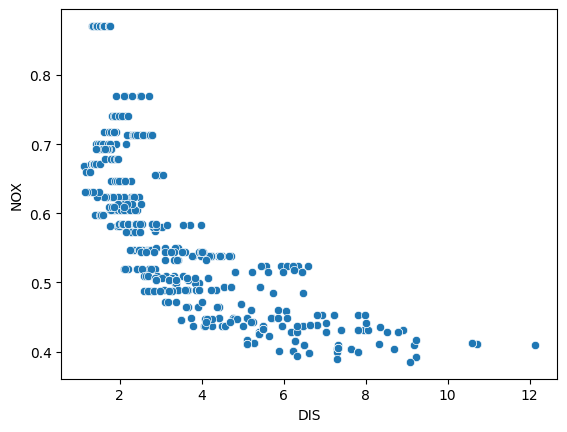

In [ ]:
sns.scatterplot(x=df['DIS'], y=df['NOX'])

* Terlihat ada korelasi negatif antara NOX dan DIS

## Pie Chart

([<matplotlib.patches.Wedge at 0x7f96283143d0>,
 [Text(-0.23981883683380487, -1.0735394382600394, '0.0'),
  Text(0.23981888708981233, 1.0735394270333083, '1.0')],
 [Text(-0.13081027463662082, -0.5855669663236578, '93.0%'),
  Text(0.13081030204898852, 0.5855669601999863, '7.0%')])

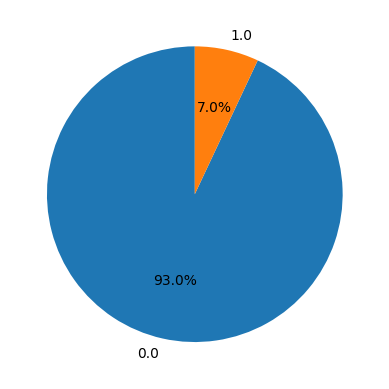

In [ ]:
plt.pie(count_chas['count'], labels=count_chas['CHAS'],
        autopct='%1.1f%%', startangle=90)

* Terlihat komposisi CHAS 0 adalah 93% dari data

# Matplotlib Anatomy

Sebagai contoh :

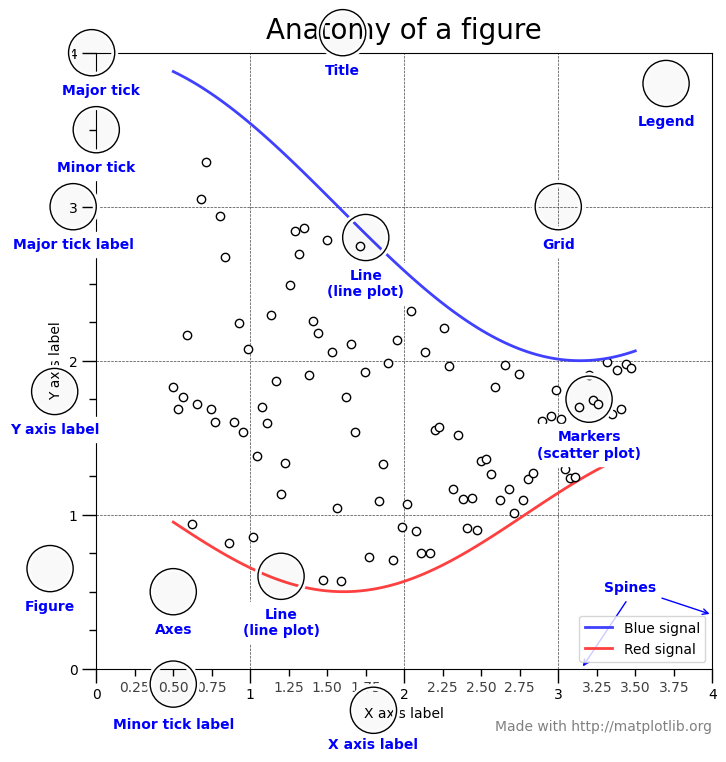

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter

np.random.seed(19680801)

X = np.linspace(0.5, 3.5, 100)
Y1 = 3+np.cos(X)
Y2 = 1+np.cos(1+X/0.75)/2
Y3 = np.random.uniform(Y1, Y2, len(X))

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, aspect=1)


def minor_tick(x, pos):
    if not x % 1.0:
        return ""
    return "%.2f" % x

ax.xaxis.set_major_locator(MultipleLocator(1.000))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(MultipleLocator(1.000))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.xaxis.set_minor_formatter(FuncFormatter(minor_tick))

ax.set_xlim(0, 4)
ax.set_ylim(0, 4)

ax.tick_params(which='major', width=1.0)
ax.tick_params(which='major', length=10)
ax.tick_params(which='minor', width=1.0, labelsize=10)
ax.tick_params(which='minor', length=5, labelsize=10, labelcolor='0.25')

ax.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)

ax.plot(X, Y1, c=(0.25, 0.25, 1.00), lw=2, label="Blue signal", zorder=10)
ax.plot(X, Y2, c=(1.00, 0.25, 0.25), lw=2, label="Red signal")
ax.plot(X, Y3, linewidth=0,
        marker='o', markerfacecolor='w', markeredgecolor='k')

ax.set_title("Anatomy of a figure", fontsize=20, verticalalignment='bottom')
ax.set_xlabel("X axis label")
ax.set_ylabel("Y axis label")

ax.legend()


def circle(x, y, radius=0.15):
    from matplotlib.patches import Circle
    from matplotlib.patheffects import withStroke
    circle = Circle((x, y), radius, clip_on=False, zorder=10, linewidth=1,
                    edgecolor='black', facecolor=(0, 0, 0, .0125),
                    path_effects=[withStroke(linewidth=5, foreground='w')])
    ax.add_artist(circle)


def text(x, y, text):
    ax.text(x, y, text, backgroundcolor="white",
            ha='center', va='top', weight='bold', color='blue')


# Minor tick
circle(0.50, -0.10)
text(0.50, -0.32, "Minor tick label")

# Major tick
circle(-0.03, 4.00)
text(0.03, 3.80, "Major tick")

# Minor tick
circle(0.00, 3.50)
text(0.00, 3.30, "Minor tick")

# Major tick label
circle(-0.15, 3.00)
text(-0.15, 2.80, "Major tick label")

# X Label
circle(1.80, -0.27)
text(1.80, -0.45, "X axis label")

# Y Label
circle(-0.27, 1.80)
text(-0.27, 1.6, "Y axis label")

# Title
circle(1.60, 4.13)
text(1.60, 3.93, "Title")

# Blue plot
circle(1.75, 2.80)
text(1.75, 2.60, "Line\n(line plot)")

# Red plot
circle(1.20, 0.60)
text(1.20, 0.40, "Line\n(line plot)")

# Scatter plot
circle(3.20, 1.75)
text(3.20, 1.55, "Markers\n(scatter plot)")

# Grid
circle(3.00, 3.00)
text(3.00, 2.80, "Grid")

# Legend
circle(3.70, 3.80)
text(3.70, 3.60, "Legend")

# Axes
circle(0.5, 0.5)
text(0.5, 0.3, "Axes")

# Figure
circle(-0.3, 0.65)
text(-0.3, 0.45, "Figure")

color = 'blue'
ax.annotate('Spines', xy=(4.0, 0.35), xycoords='data',
            xytext=(3.3, 0.5), textcoords='data',
            weight='bold', color=color,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color=color))

ax.annotate('', xy=(3.15, 0.0), xycoords='data',
            xytext=(3.45, 0.45), textcoords='data',
            weight='bold', color=color,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color=color))

ax.text(4.0, -0.4, "Made with http://matplotlib.org",
        fontsize=10, ha="right", color='.5')

plt.show()

# Interactive Visualizations

In [ ]:
px.bar(count_chas, x='CHAS', y='count')

In [ ]:
px.line(count_zn, x='ZN', y='count')

In [ ]:
px.histogram(df, 'MEDV', title='Sebaran Harga Rumah', labels={'MEDV': 'Harga'})

In [ ]:
px.pie(df, 'CHAS')

* Terlihat tampilan lebih menarik dan interaktif

# Exploratory Data Analysis

## Statistical Summary

In [ ]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


* Min-max value pada dataset terlihat reasonable
* `RM` sepertinya mempunyai distribusi yang cenderung simetris. Akan lebih baik untuk divisualisasikan.

Visualisasi untuk kolom RM

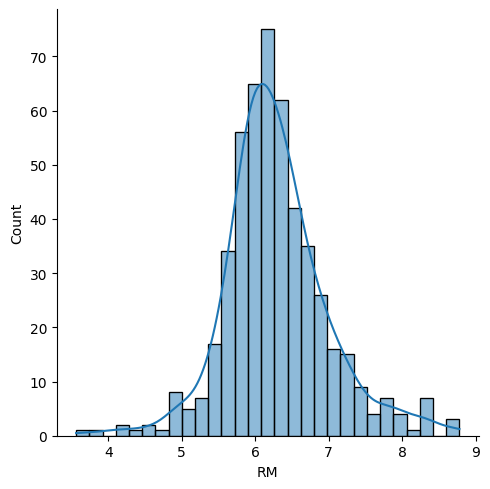

In [ ]:
sns.displot(df['RM'], kde=True)

* Tiap kolom sebaiknya divisualisasikan untuk memahami semua datanya.

## Analisis Univariate

<Axes: xlabel='MEDV', ylabel='Count'>

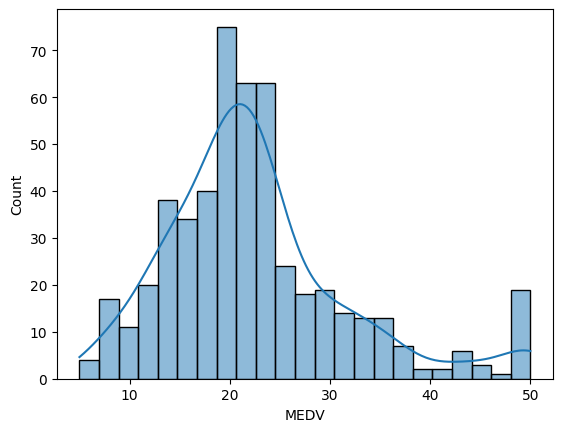

In [ ]:
sns.histplot(df['MEDV'], kde=True)

Sebaran data harga rumah relatif normal

<Axes: >

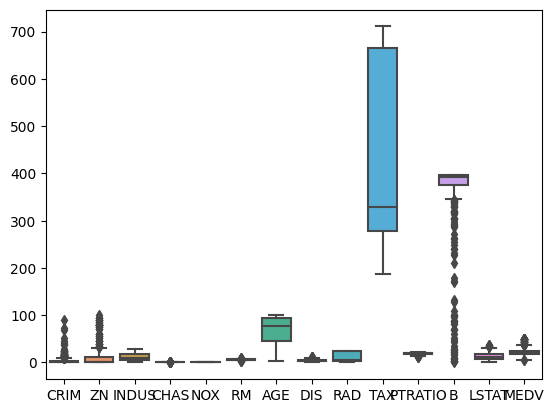

In [ ]:
sns.boxplot(data=df)

* Adanya outlier untuk beberapa kolom
* Nantinya bisa dilakukan handling outlier untuk masing-masing kolom, apakah perlu dihapus, perlu diimputasi dengan mean atau median, atau bisa dilakukan transformasi.

## Analisis Multivariate

Nilai Koefisien Korelasi Pearson: -0.7692301132258278


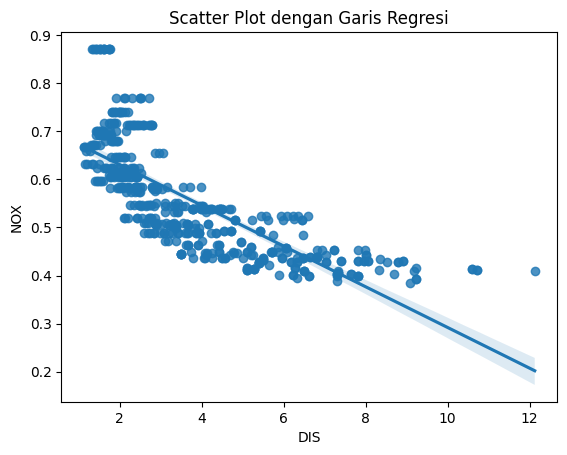

In [ ]:
from scipy import stats

# Menampilkan scatter plot dengan garis regresi
sns.regplot(x='DIS', y='NOX', data=df)

# Menghitung nilai koefisien korelasi Pearson
pearson_corr = df['DIS'].corr(df['NOX'])
print("Nilai Koefisien Korelasi Pearson:", pearson_corr)

# Menambahkan judul pada plot
plt.title('Scatter Plot dengan Garis Regresi')

# Tampilkan plot
plt.show()


* Terlihat bahwa kolom DIS dan NOX mempunyai korelasi negatif yang lumayan kuat dilihat dari nilai koefisien korelasinya adalah -0,76

<Axes: >

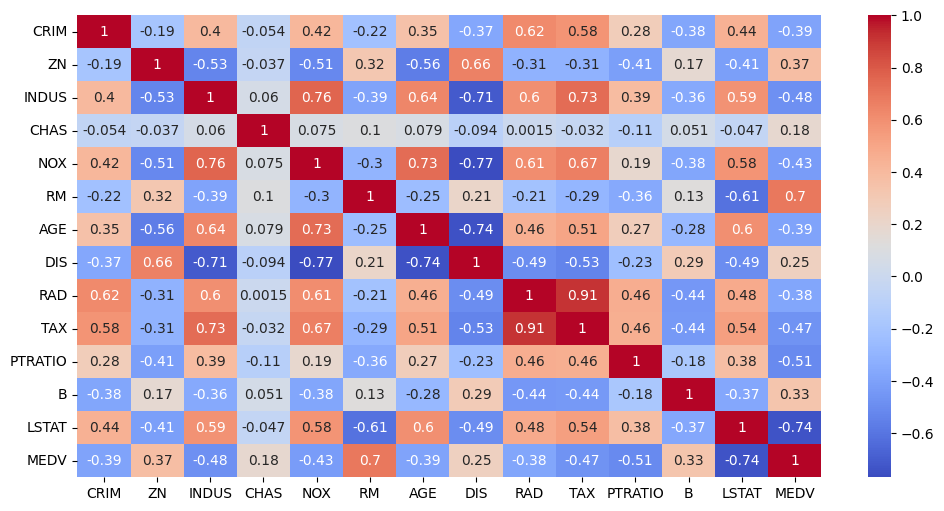

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

* `TAX` dan `RAD` terlihat mempunyai hubungan yang kuat dilihat dari nilainya adalah 0,91.
* Untuk pembuatan model nantinya, kita perlu menghapus 1 fitur agar tidak terjadi multicollinearity yang nantinya akan dijelaskan ketika machine learning.

## Deep Dive Exploration

### Apakah harga rata-rata rumah pada CHAS 0 lebih besar daripada CHAS 1

<Axes: xlabel='CHAS', ylabel='MEDV'>

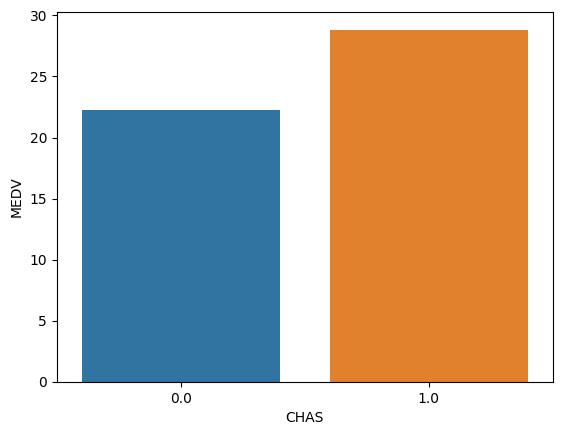

In [ ]:
df_mean = df.groupby('CHAS')['MEDV'].mean().reset_index()
sns.barplot(df_mean, x='CHAS', y='MEDV')

Terlihat bahwa rata-rata harga rumah CHAS 1 lebih besar dari harga rumah CHAS 0

### 10 usia rumah dengan jumlah terbanyak

In [ ]:
count_age = df.groupby('AGE').agg(age_count = ('AGE', 'count'))
count_age = count_age.sort_values('age_count', ascending=False).reset_index()
count_age = count_age.head(10)
count_age

,AGE,age_count
0,100.0,42
1,97.9,4
2,95.4,4
3,96.0,4
4,98.8,4
5,87.9,4
6,32.2,3
7,92.6,3
8,36.6,3
9,96.2,3


<Axes: xlabel='age_count', ylabel='AGE'>

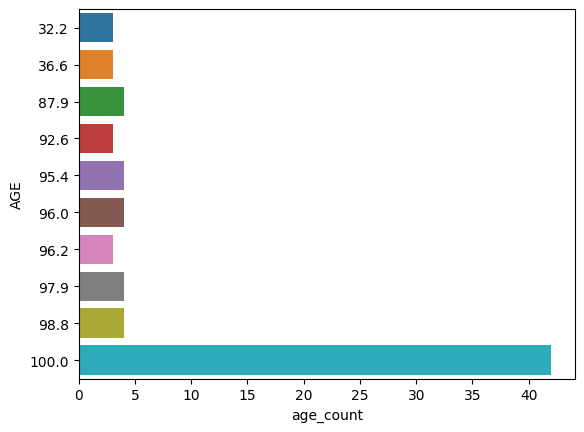

In [ ]:
sns.barplot(count_age, y='AGE', x='age_count', orient='h')

### Berapa % rumah yang harganya lebih besar dari 10

In [ ]:
above_20 = df.loc[df['MEDV'] > 20, 'MEDV'].count()
below_20 = df.loc[df['MEDV'] <= 20, 'MEDV'].count()

result_df = pd.DataFrame({'Keterangan': ['Harga > 20', 'Harga <= 20'],
                          'Jumlah Data': [above_20, below_20]})

result_df

,Keterangan,Jumlah Data
0,Harga > 20,291
1,Harga <= 20,215


Text(0.5, 1.0, 'Persentase Data Harga')

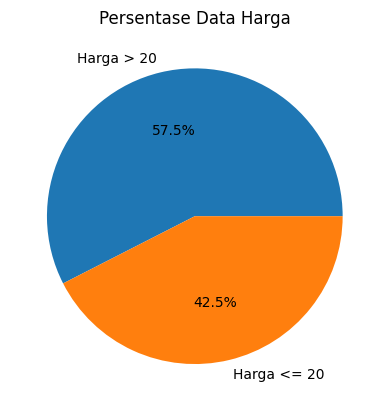

In [ ]:
plt.pie(result_df['Jumlah Data'], labels=result_df['Keterangan'], autopct='%1.1f%%')
plt.title('Persentase Data Harga')